# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import csv
import os

## 1. Importação de dados

In [2]:
categories = ['ID','Limit_Bal','Sex','Education','Marriage','Age','Pay_0','Pay_2','Pay_3','Pay_4',
              'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6',
              'Pay_Amt1','Pay_Amt2','Pay_Amt3','Pay_Amt4','Pay_Amt5','Pay_Amt6','default payment next month']

In [3]:
df = pd.read_csv('../data/raw/default_of_credit_card_clients-Data.csv', header=None, names = categories)

df = df.iloc[2:,] #Excluindo os indices xi da tabela para ficar melhor apresentável
df.reset_index(drop=True, inplace=True) # Redefinindo os índices

pd.set_option('display.max_columns', None)
df.head()

,ID,Limit_Bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1.1 Correção do tipo e Tradução de colunas 

In [4]:
sex_mapping = {1: "masculino", 2: "feminino"}
education_mapping = {1: "pós-graduação", 2: "universidade", 3: "ensino médio", 4: "outros"}
marriage_mapping = {1: "casado", 2: "solteiro", 3: "outros"}
pay_mapping = {-2: 'Fatura total paga', -1: 'Pagamento total em dia', 0: 'Pagamento parcial', 1: 'Atrasado em 1 mês', 2: 'Atrasado em 2 mês',  3: 'Atrasado em 3 mês', 4: 'Atrasado em 4 mês', 5: 'Atrasado em 5 mês', 6: 'Atrasado em 6 mês', 7: 'Atrasado em 7 mês', 8: 'Atrasado em 8 mês', 9: 'Atrasado em 9 meses ou mais'}
default_payment_mapping = {0: "não", 1: "sim"}

df["Sex"] = pd.to_numeric(df["Sex"])
df["Education"] = pd.to_numeric(df["Education"])
df["Marriage"] = pd.to_numeric(df["Marriage"])
df["Pay_0"] = pd.to_numeric(df["Pay_0"])
df["Pay_2"] = pd.to_numeric(df["Pay_2"])
df["Pay_3"] = pd.to_numeric(df["Pay_3"])
df["Pay_4"] = pd.to_numeric(df["Pay_4"])
df["Pay_5"] = pd.to_numeric(df["Pay_5"])
df["Pay_6"] = pd.to_numeric(df["Pay_6"])
df["default payment next month"] = pd.to_numeric(df["default payment next month"])

df["Sex"] = df["Sex"].map(sex_mapping)
df["Education"] = df["Education"].map(education_mapping)
df["Marriage"] = df["Marriage"].map(marriage_mapping)
df["Pay_0"] = df["Pay_0"].map(pay_mapping)
df["Pay_2"] = df["Pay_2"].map(pay_mapping)
df["Pay_3"] = df["Pay_3"].map(pay_mapping)
df["Pay_4"] = df["Pay_4"].map(pay_mapping)
df["Pay_5"] = df["Pay_5"].map(pay_mapping)
df["Pay_6"] = df["Pay_6"].map(pay_mapping)
df["default payment next month"] = df["default payment next month"].map(default_payment_mapping)

df.head()


,ID,Limit_Bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,default payment next month
0,1,20000,feminino,universidade,casado,24,Atrasado em 2 mês,Atrasado em 2 mês,Pagamento total em dia,Pagamento total em dia,Fatura total paga,Fatura total paga,3913,3102,689,0,0,0,0,689,0,0,0,0,sim
1,2,120000,feminino,universidade,solteiro,26,Pagamento total em dia,Atrasado em 2 mês,Pagamento parcial,Pagamento parcial,Pagamento parcial,Atrasado em 2 mês,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,sim
2,3,90000,feminino,universidade,solteiro,34,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,não
3,4,50000,feminino,universidade,casado,37,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,não
4,5,50000,masculino,universidade,casado,57,Pagamento total em dia,Pagamento parcial,Pagamento total em dia,Pagamento parcial,Pagamento parcial,Pagamento parcial,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,não


In [5]:
novo_nome_colunas = {
    'ID': 'ID',
    'Limit_Bal': 'Limite_Bancário',
    'Sex': 'Gênero',
    'Education': 'Nível_Educacional',
    'Marriage': 'Estado_Civil',
    'Age': 'Idade',
    'Pay_0': 'Status_Setembro',
    'Pay_2': 'Status_Agosto',
    'Pay_3': 'Status_Julho',
    'Pay_4': 'Status_Junho',
    'Pay_5': 'Status_Maio',
    'Pay_6': 'Status_Abril',
    'Bill_Amt1': 'Saldo_Setembro',
    'Bill_Amt2': 'Saldo_Agosto',
    'Bill_Amt3': 'Saldo_Julho',
    'Bill_Amt4': 'Saldo_Junho',
    'Bill_Amt5': 'Saldo_Maio',
    'Bill_Amt6': 'Saldo_Abril',
    'Pay_Amt1': 'Pagamento_Abril',
    'Pay_Amt2': 'Pagamento_Maio',
    'Pay_Amt3': 'Pagamento_Junho',
    'Pay_Amt4': 'Pagamento_Julho',
    'Pay_Amt5': 'Pagamento_Agosto',
    'Pay_Amt6': 'Pagamento_Setembro',
    'default payment next month': 'Inadimplência_Próximo_Mês'
}

df.rename(columns=novo_nome_colunas, inplace=True)

df.head()

,ID,Limite_Bancário,Gênero,Nível_Educacional,Estado_Civil,Idade,Status_Setembro,Status_Agosto,Status_Julho,Status_Junho,Status_Maio,Status_Abril,Saldo_Setembro,Saldo_Agosto,Saldo_Julho,Saldo_Junho,Saldo_Maio,Saldo_Abril,Pagamento_Abril,Pagamento_Maio,Pagamento_Junho,Pagamento_Julho,Pagamento_Agosto,Pagamento_Setembro,Inadimplência_Próximo_Mês
0,1,20000,feminino,universidade,casado,24,Atrasado em 2 mês,Atrasado em 2 mês,Pagamento total em dia,Pagamento total em dia,Fatura total paga,Fatura total paga,3913,3102,689,0,0,0,0,689,0,0,0,0,sim
1,2,120000,feminino,universidade,solteiro,26,Pagamento total em dia,Atrasado em 2 mês,Pagamento parcial,Pagamento parcial,Pagamento parcial,Atrasado em 2 mês,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,sim
2,3,90000,feminino,universidade,solteiro,34,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,não
3,4,50000,feminino,universidade,casado,37,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,Pagamento parcial,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,não
4,5,50000,masculino,universidade,casado,57,Pagamento total em dia,Pagamento parcial,Pagamento total em dia,Pagamento parcial,Pagamento parcial,Pagamento parcial,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,não


## 2. Descrição dos dados

### 2.1  Dicionário de dados

In [6]:
df_dict = pd.DataFrame({
    "ID": {
        'tradução': 'ID',
        'descricao': 'Número de identificação',
        'tipo': 'quantitativa',
        'subtipo': 'contínuo'
    },
    "Limit_Bal": {
        'tradução': 'Limite bancário',
        'descricao': 'Quantia de crédito que foi disponibilizada',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Sex": {
        'tradução': 'Sexo',
        'descricao': 'Gênero sexual (M: Masculino, F: Feminino)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    "Education": {
        'tradução': 'Educação',
        'descricao': 'Nível educacional (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outro)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    "Marriage": {
        'tradução': 'Casamento',
        'descricao': 'Estado civil (1 = casado, 2 = solteiro, 3 = outro)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    "Age": {
        'tradução': 'Idade',
        'descricao': 'Idade do cliente (em anos)',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_0": {
        'tradução': 'Pagamento (0)',
        'descricao': 'Status do pagamento em Setembro/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Pay_2": {
        'tradução': 'Pagamento (2)',
        'descricao': 'Status do pagamento em Agosto/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Pay_3": {
        'tradução': 'Pagamento (3)',
        'descricao': 'Status do pagamento em Julho/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Pay_4": {
        'tradução': 'Pagamento (4)',
        'descricao': 'Status do pagamento em Junho/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Pay_5": {
        'tradução': 'Pagamento (5)',
        'descricao': 'Status do pagamento em Maio/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Pay_6": {
        'tradução': 'Pagamento (6)',
        'descricao': 'Status do pagamento em Abril/2005 (-2 = fatura total paga, -1 = pagamento total em dia, 0 = pagamento parcial, 1 = atrasado em 1 mês, 2 = atrasado em 2 mês, 3 = atrasado em 3 mês, 4 = atrasado em 4 mês, 5 = atrasado em 5 mês, 6 = atrasado em 6 mês, 7 = atrasado em 7 mês, 8 = atrasado em 8 mês, 9 = atrasado em 9 meses ou mais)',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    "Bill_Amt1": {
        'tradução': 'Quantia da conta (1)',
        'descricao': 'Saldo em Setembro/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Bill_Amt2": {
        'tradução': 'Quantia da conta (2)',
        'descricao': 'Saldo em Agosto/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Bill_Amt3": {
        'tradução': 'Quantia da conta (3)',
        'descricao': 'Saldo em Julho/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Bill_Amt4": {
        'tradução': 'Quantia da conta (4)',
        'descricao': 'Saldo em Junho/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Bill_Amt5": {
        'tradução': 'Quantia da conta (5)',
        'descricao': 'Saldo em Maio/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Bill_Amt6": {
        'tradução': 'Quantia da conta (6)',
        'descricao': 'Saldo em Abril/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt1": {
        'tradução': 'Quantia paga (1)',
        'descricao': 'Quantia paga em Setembro/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt2": {
        'tradução': 'Quantia paga (2)',
        'descricao': 'Quantia paga em Agosto/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt3": {
        'tradução': 'Quantia paga (3)',
        'descricao': 'Quantia paga em Julho/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt4": {
        'tradução': 'Quantia paga (4)',
        'descricao': 'Quantia paga em Junho/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt5": {
        'tradução': 'Quantia paga (5)',
        'descricao': 'Quantia paga em Maio/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "Pay_Amt6": {
        'tradução': 'Quantia paga (6)',
        'descricao': 'Quantia paga em Abril/2005',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    "default_payment_next_month": {
        'tradução': 'Inadimplência no próximo mês',
        'descricao': 'Indica se um cliente entrou em inadimplência no próximo mês (0 = não , 1 = sim)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    }
})

In [7]:
with pd.option_context('display.max_colwidth',80): display(df_dict)

#Salvando o arquivo dicionário
#df_dict.to_csv('../data/external/dicionario.csv', index=False, encoding='utf-8')

,ID,Limit_Bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Bill_Amt1,Bill_Amt2,Bill_Amt3,Bill_Amt4,Bill_Amt5,Bill_Amt6,Pay_Amt1,Pay_Amt2,Pay_Amt3,Pay_Amt4,Pay_Amt5,Pay_Amt6,default_payment_next_month
tradução,ID,Limite bancário,Sexo,Educação,Casamento,Idade,Pagamento (0),Pagamento (2),Pagamento (3),Pagamento (4),Pagamento (5),Pagamento (6),Quantia da conta (1),Quantia da conta (2),Quantia da conta (3),Quantia da conta (4),Quantia da conta (5),Quantia da conta (6),Quantia paga (1),Quantia paga (2),Quantia paga (3),Quantia paga (4),Quantia paga (5),Quantia paga (6),Inadimplência no próximo mês
descricao,Número de identificação,Quantia de crédito que foi disponibilizada,"Gênero sexual (M: Masculino, F: Feminino)","Nível educacional (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 ...","Estado civil (1 = casado, 2 = solteiro, 3 = outro)",Idade do cliente (em anos),"Status do pagamento em Setembro/2005 (-2 = fatura total paga, -1 = pagamento...","Status do pagamento em Agosto/2005 (-2 = fatura total paga, -1 = pagamento t...","Status do pagamento em Julho/2005 (-2 = fatura total paga, -1 = pagamento to...","Status do pagamento em Junho/2005 (-2 = fatura total paga, -1 = pagamento to...","Status do pagamento em Maio/2005 (-2 = fatura total paga, -1 = pagamento tot...","Status do pagamento em Abril/2005 (-2 = fatura total paga, -1 = pagamento to...",Saldo em Setembro/2005,Saldo em Agosto/2005,Saldo em Julho/2005,Saldo em Junho/2005,Saldo em Maio/2005,Saldo em Abril/2005,Quantia paga em Setembro/2005,Quantia paga em Agosto/2005,Quantia paga em Julho/2005,Quantia paga em Junho/2005,Quantia paga em Maio/2005,Quantia paga em Abril/2005,"Indica se um cliente entrou em inadimplência no próximo mês (0 = não , 1 = sim)"
tipo,quantitativa,quantitativa,qualitativa,qualitativa,qualitativa,quantitativa,qualitativa,qualitativa,qualitativa,qualitativa,qualitativa,qualitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,quantitativa,qualitativa
subtipo,contínuo,contínua,nominal,nominal,nominal,contínua,ordinal,ordinal,ordinal,ordinal,ordinal,ordinal,contínua,contínua,contínua,contínua,contínua,contínua,contínua,contínua,contínua,contínua,contínua,contínua,nominal


### 2.2 Obtendo informações sobre o DataFrame

##### 2.2.1 Informações sobre a quantidade de instâncias, variáveis e seus tipos, quantidade de valores faltantes

In [22]:
from IPython.display import display, HTML

linhas = df.shape[0]
colunas = df.shape[1]

display(HTML(f'<h5> O Data Frame possui <span style="color:red">{linhas}</span> linhas e <span style="color:red">{colunas}</span> colunas.</h5>'))

In [23]:
info_dict = {
    'quantidade_instancias': len(df_dict),
    'quantidade_variaveis': len(df_dict.columns),
    'detalhes_variaveis': {}
}

for coluna, detalhes in df_dict.items():
    info_dict['detalhes_variaveis'][coluna] = {
        'traducao': detalhes['tradução'],
        'descricao': detalhes['descricao'],
        'tipo': detalhes['tipo'],
        'subtipo': detalhes['subtipo'],
        'valores_faltantes': df_dict[coluna].isnull().sum()
    }



Apresentando as informações de forma legível:


In [24]:
print(f"Quantidade de Instâncias: {info_dict['quantidade_instancias']}")
print(f"Quantidade de Variáveis: {info_dict['quantidade_variaveis']}\n")

print("Detalhes das Variáveis:")
for var, detalhes in info_dict['detalhes_variaveis'].items():
    print(f"{var}:")
    print(f"  Tradução: {detalhes['traducao']}")
    print(f"  Descrição: {detalhes['descricao']}")
    print(f"  Tipo: {detalhes['tipo']}")
    print(f"  Subtipo: {detalhes['subtipo']}")
    print(f"  Valores Faltantes: {detalhes['valores_faltantes']}\n")

Quantidade de Instâncias: 4
Quantidade de Variáveis: 25

Detalhes das Variáveis:
ID:
  Tradução: ID
  Descrição: Número de identificação
  Tipo: quantitativa
  Subtipo: contínuo
  Valores Faltantes: 0

Limit_Bal:
  Tradução: Limite bancário
  Descrição: Quantia de crédito que foi disponibilizada
  Tipo: quantitativa
  Subtipo: contínua
  Valores Faltantes: 0

Sex:
  Tradução: Sexo
  Descrição: Gênero sexual (M: Masculino, F: Feminino)
  Tipo: qualitativa
  Subtipo: nominal
  Valores Faltantes: 0

Education:
  Tradução: Educação
  Descrição: Nível educacional (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outro)
  Tipo: qualitativa
  Subtipo: nominal
  Valores Faltantes: 0

Marriage:
  Tradução: Casamento
  Descrição: Estado civil (1 = casado, 2 = solteiro, 3 = outro)
  Tipo: qualitativa
  Subtipo: nominal
  Valores Faltantes: 0

Age:
  Tradução: Idade
  Descrição: Idade do cliente (em anos)
  Tipo: quantitativa
  Subtipo: contínua
  Valores Faltantes: 0

Pay_0:
  Tradução:

 Como podemos observar, o dataframe não possui nenhum dado faltante. Dessa forma não é necessário tratamento de dados faltantes no conjunto de dados.

## 2. Perguntas de partida e hipóteses

A análise inicial dos dados requer uma reorganização para prepará-los adequadamente. Além disso, a formulação de hipóteses pode guiar a exploração de relacionamentos entre variáveis e contribuir para conclusões significativas.

### 2.1 Problematizações:

**Hipótese 01: Limite de Crédito e Inadimplência**
- *Pergunta:* Existe relação entre o limite de crédito fornecido e o risco de inadimplência?
- *Justificativa:* Limites mais elevados podem indicar menor propensão à inadimplência.

**Hipótese 02: Pagamento e Inadimplência**
- *Pergunta:* Como o histórico de pagamento e os valores pagos se relacionam com a inadimplência?
- *Justificativa:* Compreender a relação entre pagamentos passados e inadimplência.

**Hipótese 03: Pagamento Mínimo e Inadimplência**
- *Pergunta:* A existência de pagamento mínimo influencia na probabilidade de inadimplência?
- *Justificativa:* Atrasos nos pagamentos mínimos podem indicar maior risco.

**Hipótese 04: Correlação entre Limite de Crédito e Pagamento Último Mês**
- *Pergunta:* Como o limite de crédito se correlaciona com o pagamento no último mês?
- *Justificativa:* Explorar se clientes com limites mais altos tendem a fazer pagamentos mais elevados.

**Hipótese 05: Estado Civil e Inadimplência**
- *Pergunta:* O estado civil influencia a probabilidade de inadimplência?
- *Justificativa:* Explorar se clientes casados têm menor probabilidade de inadimplência.

**Hipótese 06: Distribuição da Variável Alvo**
- *Pergunta:* Como é distribuída a variável "default payment next month"?
- *Justificativa:* Compreender a natureza da inadimplência na amostra.

## 3. Insights

### 3.1 Análise das Problematizações e Resultados Obtidos

 #### - Análise da  **Hipótese 01** -

##### Importância da Hipótese 
- A hipótese inicial sugeriu que existe uma relação entre o limite de crédito fornecido aos clientes e o risco de inadimplência.
Esta hipótese é de grande importância no contexto financeiro, pois entender como o limite de crédito impacta a inadimplência pode orientar estratégias de concessão de crédito e gestão de riscos. **Vamos analisar:**

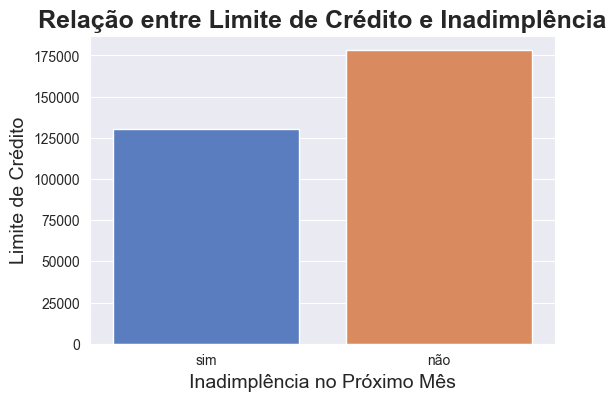

In [26]:
# Se a coluna Limite_Bancário for do tipo object, converter para tipo numérico
df["Limite_Bancário"] = pd.to_numeric(df["Limite_Bancário"], errors="coerce")

# Desativar avisos de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar o estilo do seaborn
sns.set_style('darkgrid')

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Inadimplência_Próximo_Mês", y="Limite_Bancário", data=df, ci=None, palette="muted")

# Adicionar título do gráfico (maior e em negrito)
plt.title('Relação entre Limite de Crédito e Inadimplência', fontsize=18, fontweight='bold')

# Adicionar rótulos dos eixos
plt.xlabel('Inadimplência no Próximo Mês', fontsize=14)
plt.ylabel('Limite de Crédito', fontsize=14)

# Mostrar o gráfico
plt.show()


# Restaurar os valores originais da coluna Limite_Bancário, caso necessário
df["Limite_Bancário"] = df["Limite_Bancário"].astype(object)


##### Observações a Partir do Gráfico
- Ao analisar o gráfico de caixa gerado, observamos uma clara diferenciação na distribuição do limite de crédito entre clientes que inadimpliram no próximo mês e aqueles que não inadimpliram. Os clientes com limites mais altos apresentam uma tendência acentuadamente menor de inadimplência, enquanto os clientes com limites mais baixos tendem a ter uma propensão maior.


##### **Conclusão**
- Os insights extraídos do gráfico fortalecem a hipótese original, indicando que há, de fato, uma relação entre o limite de crédito e a propensão à inadimplência. Esta descoberta tem implicações significativas para as instituições financeiras, destacando a importância de considerar o limite de crédito como um fator estratégico na gestão de riscos.

##### **Implicações Práticas**
- *Tomada de Decisão:*
  - Informações sobre o limite de crédito podem ser utilizadas na tomada de decisões mais informadas sobre a concessão de crédito a clientes.
- *Políticas de Risco:*
  - Políticas de gestão de risco podem ser ajustadas para levar em consideração o limite de crédito como um indicador relevante.

Essa justificativa reforça a validade da hipótese e destaca sua utilidade prática no cenário financeiro.

 #### - Análise da  **Hipótese 02** -

##### Importância da Hipótese 
- A hipótese sugere que o histórico de pagamento dos clientes pode influenciar a probabilidade de inadimplência. Entender como os padrões de pagamento impactam a inadimplência é crucial para desenvolver estratégias eficazes de gestão de riscos e prevenção de inadimplência. **Vamos analisar:**

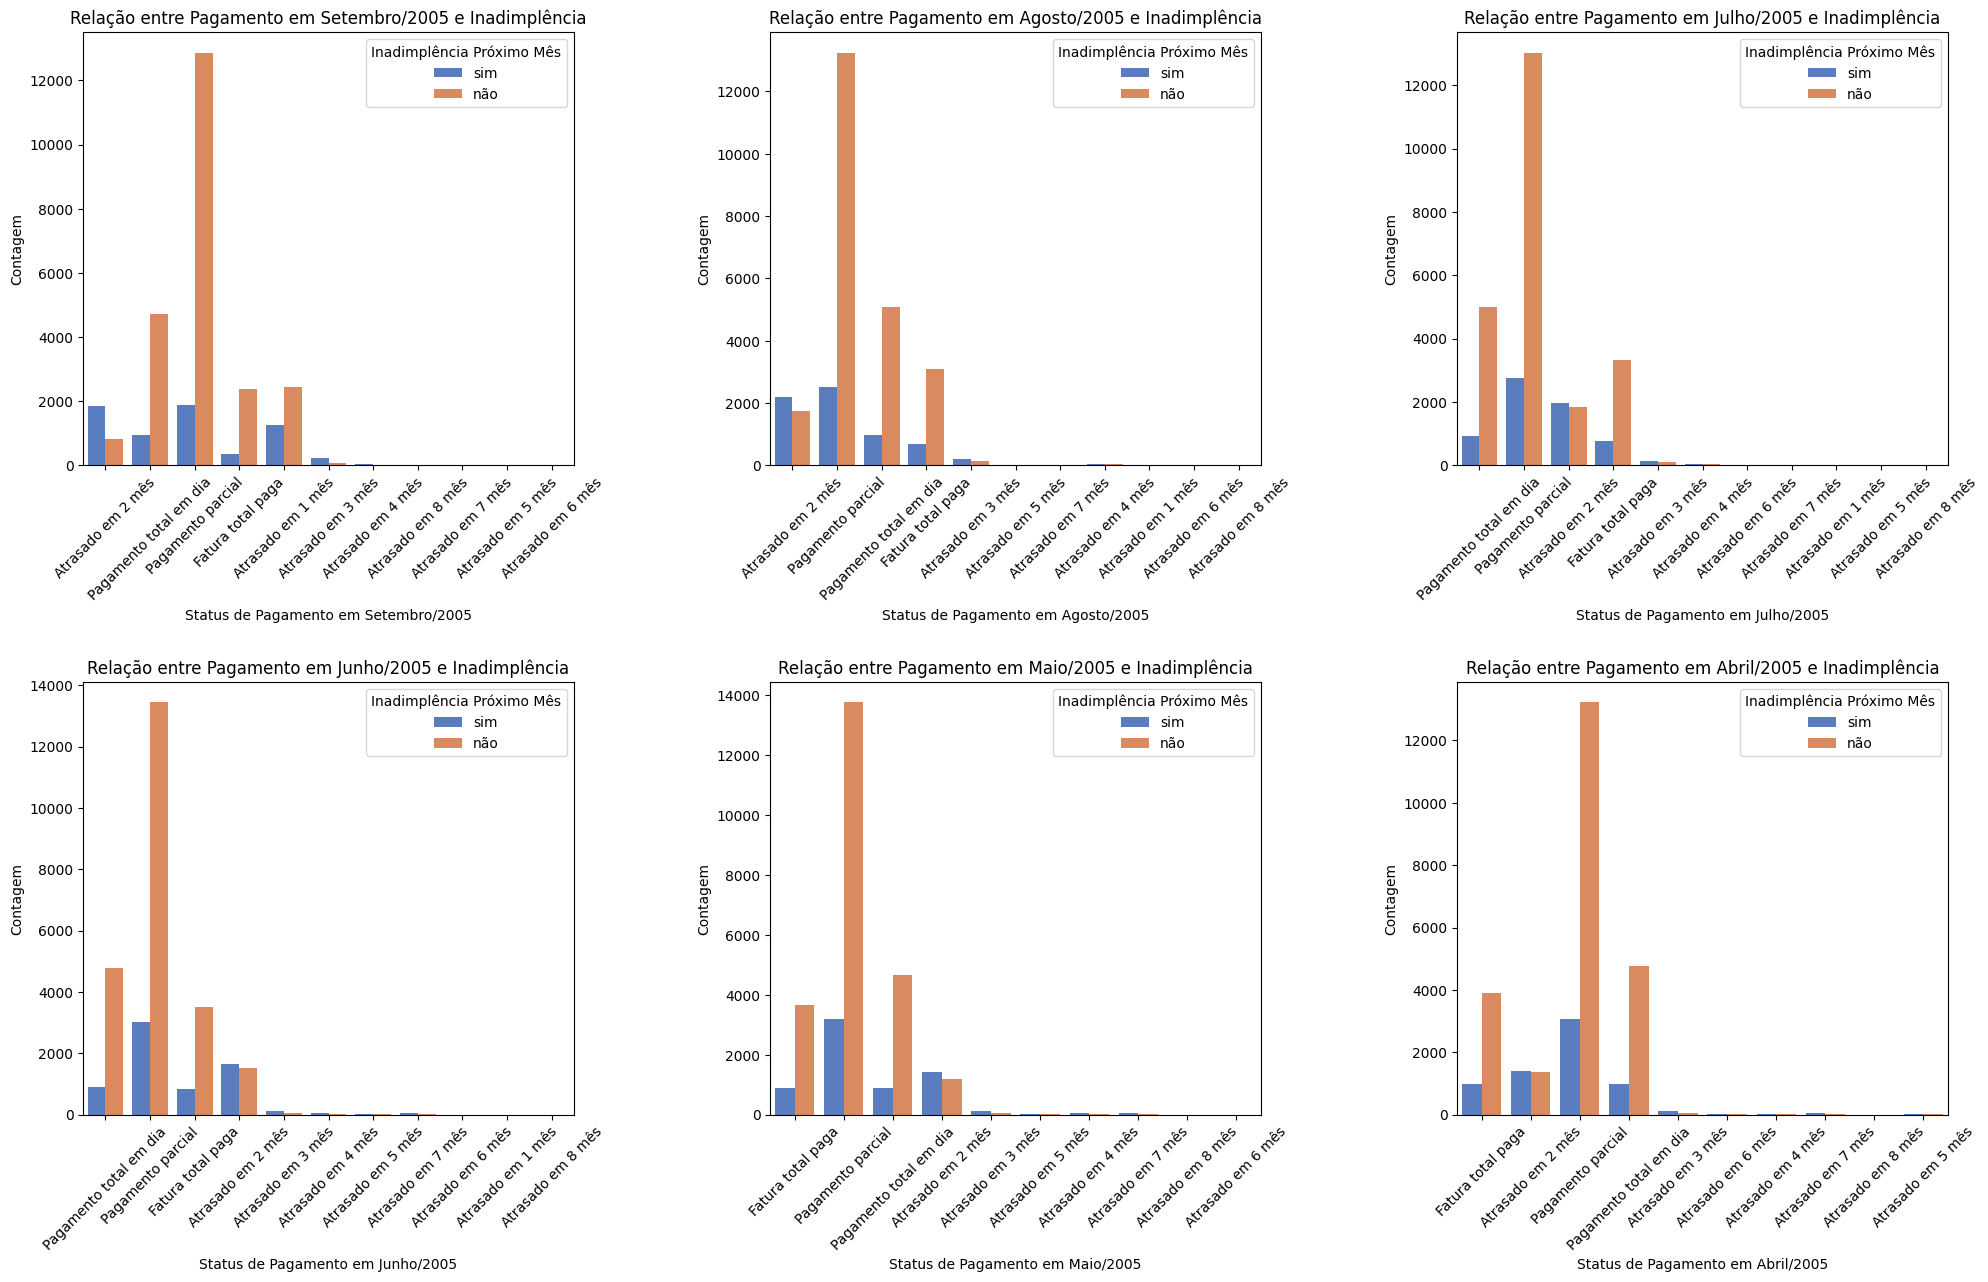

In [14]:
# Criar subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# Lista de meses e seus respectivos nomes de coluna
meses = ['Setembro', 'Agosto', 'Julho', 'Junho', 'Maio', 'Abril']
colunas_status = ['Status_Setembro', 'Status_Agosto', 'Status_Julho', 'Status_Junho', 'Status_Maio', 'Status_Abril']

# Iterar sobre os subplots e meses
for i, (ax, mes, coluna_status) in enumerate(zip(axes.flatten(), meses, colunas_status), 1):
    sns.countplot(data=df, x=coluna_status, hue='Inadimplência_Próximo_Mês', palette='muted', ax=ax)
    ax.set_xlabel(f'Status de Pagamento em {mes}/2005')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Relação entre Pagamento em {mes}/2005 e Inadimplência')
    ax.legend(title='Inadimplência Próximo Mês', loc='upper right')
    ax.tick_params(axis='x', rotation=45)  # Rotacionar os rótulos no eixo x

# Ajustar layout
plt.tight_layout()

# Ajustar a posição das legendas
plt.subplots_adjust(bottom=0.2, hspace=0.5, wspace=0.4)

plt.show()


##### Observações a Partir do Gráfico
- Ao analisar os gráficos de barras gerados para cada mês de pagamento, podemos observar padrões nas relações entre diferentes status de pagamento e a inadimplência. Essa análise detalhada revelará insights sobre quais comportamentos de pagamento estão associados a um maior risco de inadimplência.

##### **Conclusão**
- Os primeiros indícios apontam para uma relação entre o histórico de pagamento e a inadimplência. Essa descoberta pode ser valiosa para aprimorar estratégias de prevenção de inadimplência e personalização das abordagens de gestão de riscos.

##### **Implicações Práticas**
- *Personalização de Abordagens:*
  - Compreender padrões de pagamento permite a personalização das estratégias de prevenção de inadimplência para diferentes perfis de clientes.
- *Identificação Antecipada:*
  - A identificação antecipada de comportamentos de pagamento de alto risco pode informar ações proativas para evitar a inadimplência.

Essa análise inicial fornece uma visão geral das relações entre o histórico de pagamento e a inadimplência, destacando a importância prática da hipótese para estratégias de gestão de riscos.

 #### - Análise da  **Hipótese 03** -

##### Importância da Hipótese 
- A hipótese sugere que a efetuação de pagamento mínimo por parte dos clientes pode influenciar na ocorrência de inadimplência. Isto é, verificar se existe alguma relação entre aqueles que pagam parcialmente e a inadimplência do mês seguinte. **Vamos analisar:**

Text(0, 0.5, 'Quantidade')

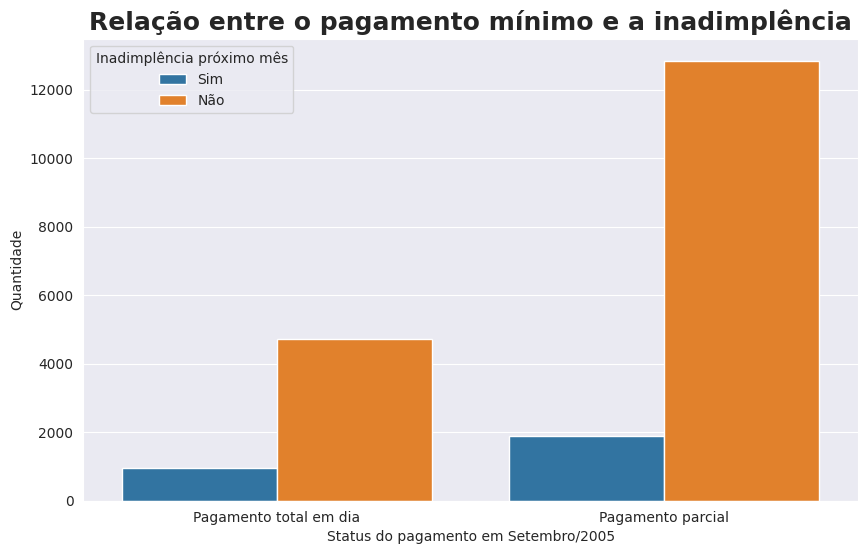

In [40]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

#Definindo o conjunto de dados para recolher apenas aqueles que fizeram o pagamento suficiente
df_parcial = df[df['Status_Setembro'].isin(['Pagamento total em dia','Pagamento parcial'])]

#Montando o countplot
sns.countplot(data=df_parcial, x="Status_Setembro", hue="Inadimplência_Próximo_Mês")

#Personalizando o gráfico
plt.legend(["Sim","Não"], title="Inadimplência próximo mês")
plt.title('Relação entre o pagamento mínimo e a inadimplência', fontsize=18, fontweight='bold')
plt.xlabel("Status do pagamento em Setembro/2005")
plt.ylabel("Quantidade")


##### Observações a Partir do Gráfico
- Ao analisar os gráficos de barras contendo os clientes que cumpriram apenas o pagamento mínimo - isto é, aqueles que realizaram o pagamento parcial - ou ficaram com o pagamento total em dia, podemos comprovar um padrão entre esse tipo de comportamento de pagamento e o risco de inadimplência. 

##### **Conclusão**
- Os primeiros indícios apontam que, há sim uma propensão maior à inadimplência, dentre aqueles que efeturaram apenas o pagamento parcial. Tal constatação é essencial para reverberar uma atenção maior a esse tipo de comportamento financeiro dos clientes.

##### **Implicações Práticas**
- *Personalização de Abordagens:*
  - Entender o que inclina os clientes à realizarem apenas o pagamento mínimo permite a personalização das estratégias de prevenção de inadimplência para diferentes perfis de clientes.
- *Identificação Antecipada:*
  - A identificação antecipada da realização de pagamentos parciais pode informar ações proativas para evitar a inadimplência.


 #### - Análise da  **Hipótese 04** -

##### Importância da Hipótese 
- A hipótese sugere que a conduta de prestação de contas no último mês, por parte dos clientes, pode ser influenciada a partir do limite de créditos que lhes foi liberado. Isto é, verificar se existe alguma relação entre aqueles com uma margem de crédito mais elevada e a inadimplência do mês seguinte. **Vamos analisar:**

 #### - Análise da  **Hipótese 05** -

##### Importância da Hipótese 
- A hipótese sugere que o estado civil de um cliente pode ser um fator influente na possibilidade de inadimplência. Essa hipótese favorece  a gestão de estratégias eficazes e específicas para prevenir o risco de inadimplência entre pessoas solteiras ou casadas. **Vamos analisar:**

Text(0, 0.5, 'Quantidade')

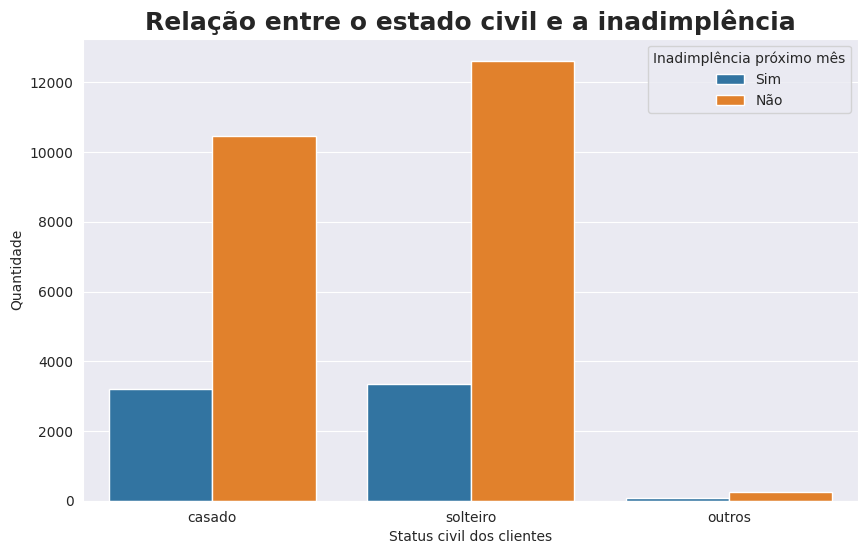

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

#Montando o countplot
sns.countplot(data=df, x="Estado_Civil", hue="Inadimplência_Próximo_Mês")

#Personalizando o gráfico
plt.legend(["Sim","Não"], title="Inadimplência próximo mês")
plt.title('Relação entre o estado civil e a inadimplência', fontsize=18, fontweight='bold')
plt.xlabel("Status civil dos clientes")
plt.ylabel("Quantidade")


##### **Conclusão**
- Averiguando os gráficos, podemos inferir que há, praticamente, quantidades minimamente diferentes entre aqueles que foram inadimplentes, em cada estado civil. Logo, é de se concluir que tal fator não é extremamente preponderante para evocar risco de inadimplência dentre os clientes.

 #### - Análise da  **Hipótese 06** -

##### Importância da Hipótese 
- A hipótese sugere que é essencial analisarmos o comportamento da variável principal de estudo do conjunto de dados. Em outras palavras, compreender o grau de inadimplência dos dados de estudo pode orientar estratégias de concessão de crédito e gestão de riscos. **Vamos analisar:**

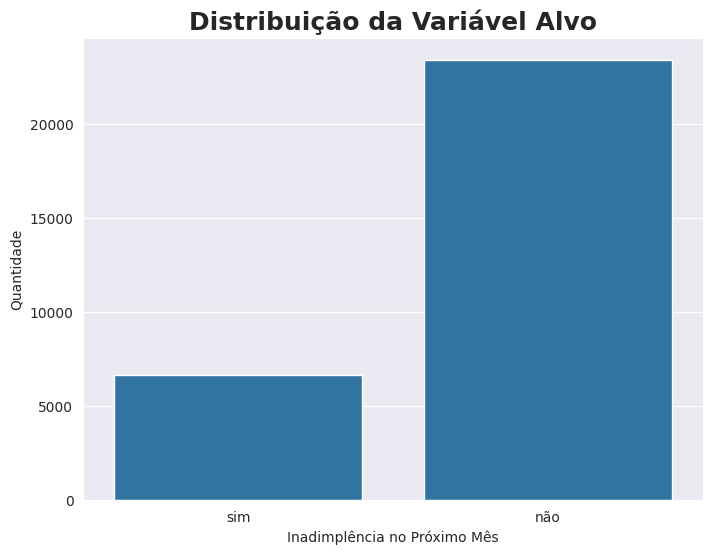

In [61]:
#Tamanho do gráfico 
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')

#Criando um gráfico de barras
sns.countplot(data=df, x='Inadimplência_Próximo_Mês')

# Adicionando rótulos aos eixos
plt.xlabel('Inadimplência no Próximo Mês')
plt.ylabel('Quantidade')
plt.title('Distribuição da Variável Alvo', fontsize=18, fontweight='bold')

plt.show()

##### Observações a Partir do Gráfico
- Ao analisar os gráficos de barras, podemos comprovar que uma parte significativa dos clientes em estudo possuem um padrão de comportamento financeiro não inadimplente.

##### **Implicações Práticas**
- *Personalização de Abordagens:*
  - Entender como o objeto de estudo se caracteriza no quesito de inadimplência de maneira isolada é importante para manejar os procedimentos de análise envolvendo as outras categorias de estudo.
- *Identificação Antecipada:*
  - A identificação antecipada do comportamento predominante nesse grupo de clientes, pode facilitar a seleção das melhores tomadas de ações para com aqueles que cometeram inadimplência.
